In [1]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv('/content/drive/MyDrive/Help/Sayeed CSE15/Intrusion-Detection-System-Using-Machine-Learning-main/data/CICIDS2017_sample.csv')

In [4]:
df

Flow Duration  Total Fwd Packets  Total Backward Packets  \
0             23595                  1                       1   
1           2015383                  3                       0   
2           4997053                  4                       0   
3            876794                  3                       4   
4             74320                  3                       4   
...             ...                ...                     ...   
6306       11507374                  5                       4   
6307       11238394                  7                       5   
6308            163                  2                       2   
6309          60718                  1                       1   
6310       11685829                  8                       5   

      Total Length of Fwd Packets  Total Length of Bwd Packets  \
0                              77                          159   
1                              18                            0   
2                              24                            0   
3                              26                        11601   
4                              26                        11601   
...                           ...                          ...   
6306                          407                         3525   
6307                          276                        11632   
6308                           70                          102   
6309                           48                          129   
6310                          564                        11632   

      Fwd Packet Length Max  Fwd Packet Length Min  Fwd Packet Length Mean  \
0                        77                     77               77.000000   
1                         6                      6                6.000000   
2                         6                      6                6.000000   
3                        20                      0                8.666667   
4                        20                      0                8.666667   
...                     ...                    ...                     ...   
6306                    407                      0               81.400000   
6307                    276                      0               39.428571   
6308                     35                     35               35.000000   
6309                     48                     48               48.000000   
6310                    564                      0               70.500000   

      Fwd Packet Length Std  Bwd Packet Length Max  ...  min_seg_size_forward  \
0                  0.000000                    159  ...                    20   
1                  0.000000                      0  ...                    20   
2                  0.000000                      0  ...                    20   
3                 10.263203                   8760  ...                    20   
4                 10.263203                   8675  ...                    20   
...                     ...                    ...  ...                   ...   
6306             182.015933                   3525  ...                    32   
6307             104.318195                  10184  ...                    32   
6308               0.000000                     51  ...                    20   
6309               0.000000                    129  ...                    32   
6310             199.404112                  10136  ...                    32   

      Active Mean  Active Std  Active Max  Active Min  Idle Mean  Idle Std  \
0             0.0         0.0           0           0        0.0       0.0   
1             0.0         0.0           0           0        0.0       0.0   
2             0.0         0.0           0           0        0.0       0.0   
3             0.0         0.0           0           0        0.0       0.0   
4             0.0         0.0           0           0        0.0       0.0   
...           ...         ...         ... 

In [5]:
df.Label.value_counts()

WebAttack       2180
Bot             1966
DoS              952
BruteForce       553
PortScan         397
BENIGN           227
Infiltration      36
Name: Label, dtype: int64

In [6]:
#df['GENDER']=df['GENDER'].map({'M':0,'F':1})

In [7]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

In [8]:
df['Label']= LE.fit_transform(df['Label'])

In [9]:
df.Label.value_counts()

6    2180
1    1966
3     952
2     553
5     397
0     227
4      36
Name: Label, dtype: int64

In [10]:
df[df.isnull().any(axis=1)]

Flow Duration  Total Fwd Packets  Total Backward Packets  \
6040              0                  2                       0   
6093              0                  2                       0   
6119              0                  2                       0   

      Total Length of Fwd Packets  Total Length of Bwd Packets  \
6040                            0                            0   
6093                            0                            0   
6119                            0                            0   

      Fwd Packet Length Max  Fwd Packet Length Min  Fwd Packet Length Mean  \
6040                      0                      0                     0.0   
6093                      0                      0                     0.0   
6119                      0                      0                     0.0   

      Fwd Packet Length Std  Bwd Packet Length Max  ...  min_seg_size_forward  \
6040                    0.0                      0  ...                    32   
6093                    0.0                      0  ...                    32   
6119                    0.0                      0  ...                    32   

      Active Mean  Active Std  Active Max  Active Min  Idle Mean  Idle Std  \
6040          0.0         0.0           0           0        0.0       0.0   
6093          0.0         0.0           0           0        0.0       0.0   
6119          0.0         0.0           0           0        0.0       0.0   

      Idle Max  Idle Min  Label  
6040         0         0      3  
6093         0         0      3  
6119         0         0      3  

[3 rows x 78 columns]

In [11]:
df.dropna(axis=0,inplace=True)

In [12]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [13]:
df.dropna(axis=0,inplace=True)

In [14]:
df[df.isnull().any(axis=1)]

Empty DataFrame
Columns: [Flow Duration, Total Fwd Packets, Total Backward Packets, Total Length of Fwd Packets, Total Length of Bwd Packets, Fwd Packet Length Max, Fwd Packet Length Min, Fwd Packet Length Mean, Fwd Packet Length Std, Bwd Packet Length Max, Bwd Packet Length Min, Bwd Packet Length Mean, Bwd Packet Length Std, Flow Bytes/s, Flow Packets/s, Flow IAT Mean, Flow IAT Std, Flow IAT Max, Flow IAT Min, Fwd IAT Total, Fwd IAT Mean, Fwd IAT Std, Fwd IAT Max, Fwd IAT Min, Bwd IAT Total, Bwd IAT Mean, Bwd IAT Std, Bwd IAT Max, Bwd IAT Min, Fwd PSH Flags, Bwd PSH Flags, Fwd URG Flags, Bwd URG Flags, Fwd Header Length, Bwd Header Length, Fwd Packets/s, Bwd Packets/s, Min Packet Length, Max Packet Length, Packet Length Mean, Packet Length Std, Packet Length Variance, FIN Flag Count, SYN Flag Count, RST Flag Count, PSH Flag Count, ACK Flag Count, URG Flag Count, CWE Flag Count, ECE Flag Count, Down/Up Ratio, Average Packet Size, Avg Fwd Segment Size, Avg Bwd Segment Size, Fwd Header Length.1, Fwd Avg Bytes/Bulk, Fwd Avg Packets/Bulk, Fwd Avg Bulk Rate, Bwd Avg Bytes/Bulk, Bwd Avg Packets/Bulk, Bwd Avg Bulk Rate, Subflow Fwd Packets, Subflow Fwd Bytes, Subflow Bwd Packets, Subflow Bwd Bytes, Init_Win_bytes_forward, Init_Win_bytes_backward, act_data_pkt_fwd, min_seg_size_forward, Active Mean, Active Std, Active Max, Active Min, Idle Mean, Idle Std, Idle Max, Idle Min, Label]
Index: []

[0 rows x 78 columns]

In [15]:
X=df.drop(['Label'],axis=1)

In [16]:
X

Flow Duration  Total Fwd Packets  Total Backward Packets  \
0             23595                  1                       1   
1           2015383                  3                       0   
2           4997053                  4                       0   
3            876794                  3                       4   
4             74320                  3                       4   
...             ...                ...                     ...   
6306       11507374                  5                       4   
6307       11238394                  7                       5   
6308            163                  2                       2   
6309          60718                  1                       1   
6310       11685829                  8                       5   

      Total Length of Fwd Packets  Total Length of Bwd Packets  \
0                              77                          159   
1                              18                            0   
2                              24                            0   
3                              26                        11601   
4                              26                        11601   
...                           ...                          ...   
6306                          407                         3525   
6307                          276                        11632   
6308                           70                          102   
6309                           48                          129   
6310                          564                        11632   

      Fwd Packet Length Max  Fwd Packet Length Min  Fwd Packet Length Mean  \
0                        77                     77               77.000000   
1                         6                      6                6.000000   
2                         6                      6                6.000000   
3                        20                      0                8.666667   
4                        20                      0                8.666667   
...                     ...                    ...                     ...   
6306                    407                      0               81.400000   
6307                    276                      0               39.428571   
6308                     35                     35               35.000000   
6309                     48                     48               48.000000   
6310                    564                      0               70.500000   

      Fwd Packet Length Std  Bwd Packet Length Max  ...  act_data_pkt_fwd  \
0                  0.000000                    159  ...                 0   
1                  0.000000                      0  ...                 2   
2                  0.000000                      0  ...                 3   
3                 10.263203                   8760  ...                 2   
4                 10.263203                   8675  ...                 2   
...                     ...                    ...  ...               ...   
6306             182.015933                   3525  ...                 1   
6307             104.318195                  10184  ...                 1   
6308               0.000000                     51  ...                 1   
6309               0.000000                    129  ...                 0   
6310             199.404112                  10136  ...                 1   

      min_seg_size_forward  Active Mean  Active Std  Active Max  Active Min  \
0                       20          0.0         0.0           0           0   
1                       20          0.0         0.0           0           0   
2                       20          0.0         0.0           0           0   
3                       20          0.0         0.0           0           0   
4                       20          0.0         0.0           0           0   
...                    ...          ...         ...         ...         ...   
6306 

In [17]:
y=df.iloc[:,-1]

In [18]:
y

0       0
1       0
2       3
3       3
4       3
       ..
6306    3
6307    3
6308    0
6309    0
6310    3
Name: Label, Length: 6297, dtype: int64

In [19]:
from sklearn.feature_selection import VarianceThreshold
def variance_threshold_selector(data, threshold=0.5):
    selector = VarianceThreshold(threshold)
    selector.fit(data)
    return data[data.columns[selector.get_support(indices=True)]]

In [20]:
variance_threshold_selector(X,0.01)

Flow Duration  Total Fwd Packets  Total Backward Packets  \
0             23595                  1                       1   
1           2015383                  3                       0   
2           4997053                  4                       0   
3            876794                  3                       4   
4             74320                  3                       4   
...             ...                ...                     ...   
6306       11507374                  5                       4   
6307       11238394                  7                       5   
6308            163                  2                       2   
6309          60718                  1                       1   
6310       11685829                  8                       5   

      Total Length of Fwd Packets  Total Length of Bwd Packets  \
0                              77                          159   
1                              18                            0   
2                              24                            0   
3                              26                        11601   
4                              26                        11601   
...                           ...                          ...   
6306                          407                         3525   
6307                          276                        11632   
6308                           70                          102   
6309                           48                          129   
6310                          564                        11632   

      Fwd Packet Length Max  Fwd Packet Length Min  Fwd Packet Length Mean  \
0                        77                     77               77.000000   
1                         6                      6                6.000000   
2                         6                      6                6.000000   
3                        20                      0                8.666667   
4                        20                      0                8.666667   
...                     ...                    ...                     ...   
6306                    407                      0               81.400000   
6307                    276                      0               39.428571   
6308                     35                     35               35.000000   
6309                     48                     48               48.000000   
6310                    564                      0               70.500000   

      Fwd Packet Length Std  Bwd Packet Length Max  ...  act_data_pkt_fwd  \
0                  0.000000                    159  ...                 0   
1                  0.000000                      0  ...                 2   
2                  0.000000                      0  ...                 3   
3                 10.263203                   8760  ...                 2   
4                 10.263203                   8675  ...                 2   
...                     ...                    ...  ...               ...   
6306             182.015933                   3525  ...                 1   
6307             104.318195                  10184  ...                 1   
6308               0.000000                     51  ...                 1   
6309               0.000000                    129  ...                 0   
6310             199.404112                  10136  ...                 1   

      min_seg_size_forward  Active Mean  Active Std  Active Max  Active Min  \
0                       20          0.0         0.0           0           0   
1                       20          0.0         0.0           0           0   
2                       20          0.0         0.0           0           0   
3                       20          0.0         0.0           0           0   
4                       20          0.0         0.0           0           0   
...                    ...          ...         ...         ...         ...   
6306 

In [21]:
variance_threshold_selector(X, 0.1)

Flow Duration  Total Fwd Packets  Total Backward Packets  \
0             23595                  1                       1   
1           2015383                  3                       0   
2           4997053                  4                       0   
3            876794                  3                       4   
4             74320                  3                       4   
...             ...                ...                     ...   
6306       11507374                  5                       4   
6307       11238394                  7                       5   
6308            163                  2                       2   
6309          60718                  1                       1   
6310       11685829                  8                       5   

      Total Length of Fwd Packets  Total Length of Bwd Packets  \
0                              77                          159   
1                              18                            0   
2                              24                            0   
3                              26                        11601   
4                              26                        11601   
...                           ...                          ...   
6306                          407                         3525   
6307                          276                        11632   
6308                           70                          102   
6309                           48                          129   
6310                          564                        11632   

      Fwd Packet Length Max  Fwd Packet Length Min  Fwd Packet Length Mean  \
0                        77                     77               77.000000   
1                         6                      6                6.000000   
2                         6                      6                6.000000   
3                        20                      0                8.666667   
4                        20                      0                8.666667   
...                     ...                    ...                     ...   
6306                    407                      0               81.400000   
6307                    276                      0               39.428571   
6308                     35                     35               35.000000   
6309                     48                     48               48.000000   
6310                    564                      0               70.500000   

      Fwd Packet Length Std  Bwd Packet Length Max  ...  act_data_pkt_fwd  \
0                  0.000000                    159  ...                 0   
1                  0.000000                      0  ...                 2   
2                  0.000000                      0  ...                 3   
3                 10.263203                   8760  ...                 2   
4                 10.263203                   8675  ...                 2   
...                     ...                    ...  ...               ...   
6306             182.015933                   3525  ...                 1   
6307             104.318195                  10184  ...                 1   
6308               0.000000                     51  ...                 1   
6309               0.000000                    129  ...                 0   
6310             199.404112                  10136  ...                 1   

      min_seg_size_forward  Active Mean  Active Std  Active Max  Active Min  \
0                       20          0.0         0.0           0           0   
1                       20          0.0         0.0           0           0   
2                       20          0.0         0.0           0           0   
3                       20          0.0         0.0           0           0   
4                       20          0.0         0.0           0           0   
...                    ...          ...         ...         ...         ...   
6306 

In [22]:
X=variance_threshold_selector(X, 0.05)

In [23]:
X.shape

(6297, 62)

In [24]:
#Remove duplicate features


In [25]:
# first Transpose(converts rows into columns and columns into rows)
X_t=X.T
#x_test_t=x_test.T

In [26]:
# after apply transpose, converts into pandas DataFrame.Make it easy to remove the column
X_t=pd.DataFrame(X_t)
#x_test_t=pd.DataFrame(x_test_t)

In [27]:
X_t.shape # , x_test_t.shape

(62, 6297)

In [28]:
# Check numbers of duplicate features
X_t.duplicated().sum()

7

In [29]:
duplicated_features=X_t.duplicated()
print(duplicated_features)

Flow Duration                  False
Total Fwd Packets              False
Total Backward Packets         False
Total Length of Fwd Packets    False
Total Length of Bwd Packets    False
                               ...  
Active Min                     False
Idle Mean                      False
Idle Std                       False
Idle Max                       False
Idle Min                       False
Length: 62, dtype: bool


In [30]:
features_to_keep=[not index for index in duplicated_features]
print(features_to_keep)

[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, False, False, False, False, False, False, True, True, True, True, True, True, True, True, True, True, True, True]


In [31]:
X=X_t[features_to_keep].T
#x_test=x_test_t[features_to_keep].T

In [32]:
X.shape

(6297, 55)

In [33]:
X.head()

Flow Duration  Total Fwd Packets  Total Backward Packets  \
0        23595.0                1.0                     1.0   
1      2015383.0                3.0                     0.0   
2      4997053.0                4.0                     0.0   
3       876794.0                3.0                     4.0   
4        74320.0                3.0                     4.0   

   Total Length of Fwd Packets  Total Length of Bwd Packets  \
0                         77.0                        159.0   
1                         18.0                          0.0   
2                         24.0                          0.0   
3                         26.0                      11601.0   
4                         26.0                      11601.0   

   Fwd Packet Length Max  Fwd Packet Length Min  Fwd Packet Length Mean  \
0                   77.0                   77.0               77.000000   
1                    6.0                    6.0                6.000000   
2                    6.0                    6.0                6.000000   
3                   20.0                    0.0                8.666667   
4                   20.0                    0.0                8.666667   

   Fwd Packet Length Std  Bwd Packet Length Max  ...  act_data_pkt_fwd  \
0               0.000000                  159.0  ...               0.0   
1               0.000000                    0.0  ...               2.0   
2               0.000000                    0.0  ...               3.0   
3              10.263203                 8760.0  ...               2.0   
4              10.263203                 8675.0  ...               2.0   

   min_seg_size_forward  Active Mean  Active Std  Active Max  Active Min  \
0                  20.0          0.0         0.0         0.0         0.0   
1                  20.0          0.0         0.0         0.0         0.0   
2                  20.0          0.0         0.0         0.0         0.0   
3                  20.0          0.0         0.0         0.0         0.0   
4                  20.0          0.0         0.0         0.0         0.0   

   Idle Mean  Idle Std  Idle Max  Idle Min  
0        0.0       0.0       0.0       0.0  
1        0.0       0.0       0.0       0.0  
2        0.0       0.0       0.0       0.0  
3        0.0       0.0       0.0       0.0  
4        0.0       0.0       0.0       0.0  

[5 rows x 55 columns]

Forword feature selection

In [34]:
'''
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()'''
from xgboost import XGBClassifier
xg = XGBClassifier()
#xg_fit=xg.fit(x_train, y_train)

In [35]:
!pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [36]:
'''from mlxtend.feature_selection import SequentialFeatureSelector
ffs=SequentialFeatureSelector(xg,k_features='best',forward=True,n_jobs=-1)
ffs.fit(X,y)
features=list(ffs.k_feature_names_)
#features=list(map(int,features))
features'''

"from mlxtend.feature_selection import SequentialFeatureSelector\nffs=SequentialFeatureSelector(xg,k_features='best',forward=True,n_jobs=-1)\nffs.fit(X,y)\nfeatures=list(ffs.k_feature_names_)\n#features=list(map(int,features))\nfeatures"

Backward feature selection

In [37]:
from imblearn.over_sampling import SMOTE
from collections import Counter
counter=Counter(y)
print('Before oversampling',counter)
sm=SMOTE()
X,y = sm.fit_resample(X,y)
counter=Counter(y)
print('After oversampling',counter)

Before oversampling Counter({6: 2180, 1: 1956, 3: 949, 2: 553, 5: 396, 0: 227, 4: 36})
After oversampling Counter({0: 2180, 3: 2180, 5: 2180, 1: 2180, 4: 2180, 6: 2180, 2: 2180})


In [38]:
X[X.isnull().any(axis=1)]

Empty DataFrame
Columns: [Flow Duration, Total Fwd Packets, Total Backward Packets, Total Length of Fwd Packets, Total Length of Bwd Packets, Fwd Packet Length Max, Fwd Packet Length Min, Fwd Packet Length Mean, Fwd Packet Length Std, Bwd Packet Length Max, Bwd Packet Length Min, Bwd Packet Length Mean, Bwd Packet Length Std, Flow Bytes/s, Flow Packets/s, Flow IAT Mean, Flow IAT Std, Flow IAT Max, Flow IAT Min, Fwd IAT Total, Fwd IAT Mean, Fwd IAT Std, Fwd IAT Max, Fwd IAT Min, Bwd IAT Total, Bwd IAT Mean, Bwd IAT Std, Bwd IAT Max, Bwd IAT Min, Fwd Header Length, Bwd Header Length, Fwd Packets/s, Bwd Packets/s, Min Packet Length, Max Packet Length, Packet Length Mean, Packet Length Std, Packet Length Variance, PSH Flag Count, ACK Flag Count, URG Flag Count, Down/Up Ratio, Average Packet Size, Init_Win_bytes_forward, Init_Win_bytes_backward, act_data_pkt_fwd, min_seg_size_forward, Active Mean, Active Std, Active Max, Active Min, Idle Mean, Idle Std, Idle Max, Idle Min]
Index: []

[0 rows x 55 columns]

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [40]:
x_train.shape,y_train.shape

((12208, 55), (12208,))

In [41]:
x_test.shape,y_test.shape

((3052, 55), (3052,))

In [42]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

lr=LogisticRegression()
lr.fit(x_train,y_train)

predlr=lr.predict(x_test)

print(f"Accuracy of support vector  classifier is: {accuracy_score(y_test,predlr )}")

print(confusion_matrix(y_test, predlr))
print(classification_report(y_test, predlr))

Accuracy of support vector  classifier is: 0.6893840104849279
[[138  29   0 168  38  57  10]
 [  0 106   0  15   0 155 143]
 [  0   0 229  49   0 182   0]
 [  4   3   0 397   3   1  12]
 [  3   4   0   9 405   0   5]
 [  1   0   0   0   0 440   0]
 [  0   3   5   3   9  37 389]]
              precision    recall  f1-score   support

           0       0.95      0.31      0.47       440
           1       0.73      0.25      0.38       419
           2       0.98      0.50      0.66       460
           3       0.62      0.95      0.75       420
           4       0.89      0.95      0.92       426
           5       0.50      1.00      0.67       441
           6       0.70      0.87      0.77       446

    accuracy                           0.69      3052
   macro avg       0.77      0.69      0.66      3052
weighted avg       0.77      0.69      0.66      3052



/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [43]:
from sklearn import tree
from sklearn.metrics import accuracy_score

modelDTC = tree.DecisionTreeClassifier()
modelDTC.fit(x_train, y_train)
#print(modelDTC.score(x_test_smt, y_test_smt))

# Predicting the Test set results
y_pred = modelDTC.predict(x_test)
ac = accuracy_score(y_test, y_pred)
print(ac)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9921363040629095
[[431   2   0   2   1   2   2]
 [  1 418   0   0   0   0   0]
 [  2   0 458   0   0   0   0]
 [  5   0   0 413   0   0   2]
 [  3   0   0   0 423   0   0]
 [  0   0   0   0   0 441   0]
 [  2   0   0   0   0   0 444]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       440
           1       1.00      1.00      1.00       419
           2       1.00      1.00      1.00       460
           3       1.00      0.98      0.99       420
           4       1.00      0.99      1.00       426
           5       1.00      1.00      1.00       441
           6       0.99      1.00      0.99       446

    accuracy                           0.99      3052
   macro avg       0.99      0.99      0.99      3052
weighted avg       0.99      0.99      0.99      3052



In [44]:
from sklearn import ensemble
from sklearn.metrics import accuracy_score

modelRFC = ensemble.RandomForestClassifier()
modelRFC.fit(x_train, y_train)
#print(modelRFC.score(x_test, y_test))


# Predicting the Test set results
y_pred = modelRFC.predict(x_test)
ac = accuracy_score(y_test, y_pred)
print(ac)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9954128440366973
[[435   2   1   0   0   0   2]
 [  1 418   0   0   0   0   0]
 [  1   0 458   0   0   0   1]
 [  2   0   1 416   0   0   1]
 [  0   0   0   0 426   0   0]
 [  0   0   0   0   0 441   0]
 [  1   0   0   1   0   0 444]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       440
           1       1.00      1.00      1.00       419
           2       1.00      1.00      1.00       460
           3       1.00      0.99      0.99       420
           4       1.00      1.00      1.00       426
           5       1.00      1.00      1.00       441
           6       0.99      1.00      0.99       446

    accuracy                           1.00      3052
   macro avg       1.00      1.00      1.00      3052
weighted avg       1.00      1.00      1.00      3052



In [45]:
from xgboost import XGBClassifier
xg = XGBClassifier()
xg_fit=xg.fit(x_train, y_train)
predxg = xg_fit.predict(x_test)

print(f"Accuracy of support vector  classifier is: {accuracy_score(y_test,predxg )}")

print(confusion_matrix(y_test, predxg))
print(classification_report(y_test, predxg))

Accuracy of support vector  classifier is: 0.997051114023591
[[437   2   0   0   0   0   1]
 [  1 418   0   0   0   0   0]
 [  0   0 459   0   0   0   1]
 [  2   0   2 416   0   0   0]
 [  0   0   0   0 426   0   0]
 [  0   0   0   0   0 441   0]
 [  0   0   0   0   0   0 446]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       440
           1       1.00      1.00      1.00       419
           2       1.00      1.00      1.00       460
           3       1.00      0.99      1.00       420
           4       1.00      1.00      1.00       426
           5       1.00      1.00      1.00       441
           6       1.00      1.00      1.00       446

    accuracy                           1.00      3052
   macro avg       1.00      1.00      1.00      3052
weighted avg       1.00      1.00      1.00      3052



In [46]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 KB 15.4 MB/s eta 0:00:00


In [48]:
import shap
explainer = shap.Explainer(xg_fit, x_train)
shap_values = explainer(x_train)

100%|===================| 85454/85456 [13:59<00:00]       

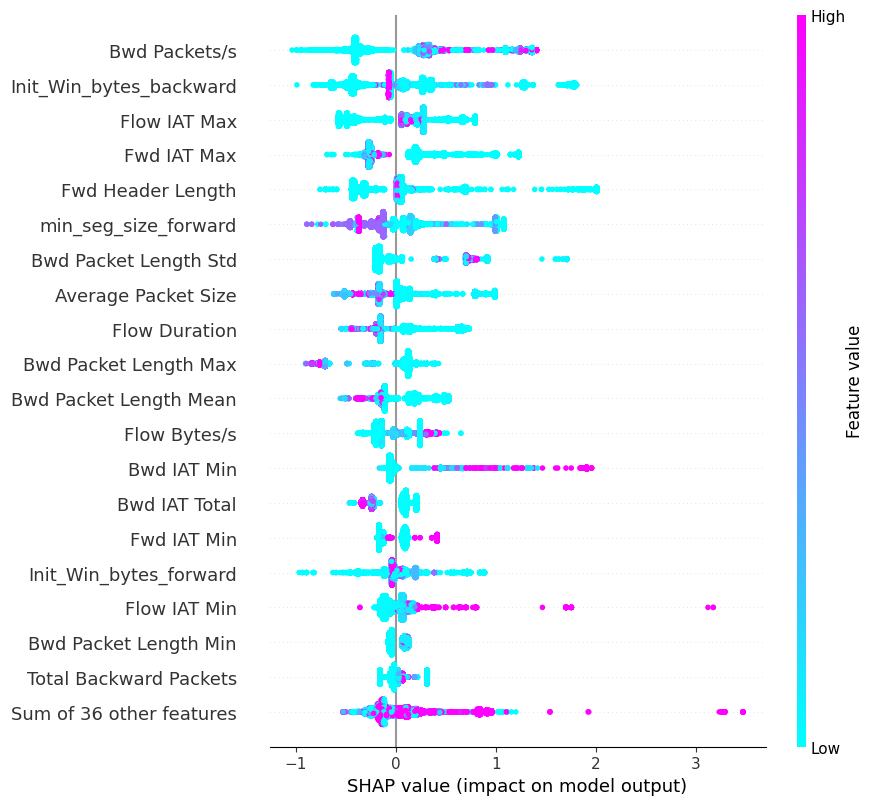

In [54]:
import matplotlib.pyplot as plt
shap.plots.beeswarm(shap_values[:, :, 1],max_display=20,color=plt.get_cmap("cool"))


In [71]:
import matplotlib.pyplot as plt
shap.plots.beeswarm(shap_values[:, :, 1],max_display=20)

ValueError: ignored

In [ ]:
import matplotlib.pyplot as plt
shap.plots.beeswarm(shap_values[:, :, 1],max_display=20,color=plt.get_cmap("cool"))

In [55]:
row_to_show=10
data_for_prediction=x_test.iloc[row_to_show]
data_for_prediction_array=data_for_prediction.values.reshape(1,-1)
xg_fit.predict_proba(data_for_prediction_array)

array([[8.1931785e-06, 5.2838836e-06, 7.8204312e-06, 1.2945004e-05,
        2.5432432e-06, 5.9679051e-06, 9.9995720e-01]], dtype=float32)

In [57]:
# calculate shap values
import shap
explainer=shap.TreeExplainer(modelRFC)
shap_values=explainer.shap_values(data_for_prediction)
shap.initjs()

In [58]:
shap.initjs()
shap.force_plot(explainer.expected_value[1],shap_values[1],data_for_prediction)

In [59]:
shap.initjs()
shap.force_plot(explainer.expected_value[0],shap_values[0],data_for_prediction)

In [60]:
!pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 KB 9.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283859 sha256=cf75665556de40604632c0e3467de76f6f478b1f077273b7bc4a8196a7bfe952
  Stored in directory: /root/.cache/pip/wheels/ed/d7/c9/5a0130d06d6310bc6cbe55220e6e72dcb8c4eff9a478717066
Successfully built lime


In [61]:
import lime
from lime import lime_tabular

In [62]:
explainer=lime_tabular.LimeTabularExplainer(training_data=np.array(x_train),
                                            feature_names=x_train.columns,
                                            class_names=[0,1,2,3,4,5,6],
                                            mode='classification')

In [66]:
exp=explainer.explain_instance(data_row=x_test.iloc[200],
                               predict_fn=xg_fit.predict_proba)
exp.show_in_notebook(show_table=True)

In [68]:
exp=explainer.explain_instance(data_row=x_test.iloc[10],
                               predict_fn=xg_fit.predict_proba)
exp.show_in_notebook(show_table=True)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
modelSVC = SVC()
modelSVC.fit(x_train, y_train)
#print(modelSVC.score(x_test, y_test))

y_pred = modelSVC.predict(x_test)
ac = accuracy_score(y_test, y_pred)
print(ac)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.5674967234600262
[[ 51 374   0   0   7   0   8]
 [  1 412   0   6   0   0   0]
 [  1 222 237   0   0   0   0]
 [  3 137   0 262   0   0  18]
 [  3  30   3   0 381   0   9]
 [  0 441   0   0   0   0   0]
 [  0  42  15   0   0   0 389]]
              precision    recall  f1-score   support

           0       0.86      0.12      0.20       440
           1       0.25      0.98      0.40       419
           2       0.93      0.52      0.66       460
           3       0.98      0.62      0.76       420
           4       0.98      0.89      0.94       426
           5       0.00      0.00      0.00       441
           6       0.92      0.87      0.89       446

    accuracy                           0.57      3052
   macro avg       0.70      0.57      0.55      3052
weighted avg       0.70      0.57      0.55      3052



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
# loss = 'hinge'
modelSGDC = SGDClassifier()#loss = 'log', penalty = "l1", max_iter = 10
modelSGDC.fit(x_train, y_train)
#print(modelSGDC.score(x_test_smt, y_test_smt))

# Predicting the Test set results
y_pred = modelSGDC.predict(x_test)
ac = accuracy_score(y_test, y_pred)
print(ac)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.6730013106159896
[[165  15  20  27   6  36 171]
 [ 17   6   0  13   0 124 259]
 [  0   2 344   0   0 111   3]
 [ 14   0  14 322   8   1  61]
 [  5   1   4   0 373   0  43]
 [  0   0   0   0   0 441   0]
 [  0   0   3   0   3  37 403]]
              precision    recall  f1-score   support

           0       0.82      0.38      0.51       440
           1       0.25      0.01      0.03       419
           2       0.89      0.75      0.81       460
           3       0.89      0.77      0.82       420
           4       0.96      0.88      0.91       426
           5       0.59      1.00      0.74       441
           6       0.43      0.90      0.58       446

    accuracy                           0.67      3052
   macro avg       0.69      0.67      0.63      3052
weighted avg       0.69      0.67      0.63      3052



In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

modelABC = AdaBoostClassifier(random_state = 96)
modelABC.fit(x_train, y_train)
#print(modelABC.score(x_test_smt, y_test_smt))

# Predicting the Test set results
y_pred = modelABC.predict(x_test)
ac = accuracy_score(y_test, y_pred)
print(ac)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.5825688073394495
[[ 26   0 122  18 261  12   1]
 [  0   0 156   0 147 116   0]
 [  0   0 460   0   0   0   0]
 [  1   0 332  82   3   2   0]
 [ 10   0   0  14 392  10   0]
 [  0   0   0   0   2 439   0]
 [  0   0  67   0   0   0 379]]
              precision    recall  f1-score   support

           0       0.70      0.06      0.11       440
           1       0.00      0.00      0.00       419
           2       0.40      1.00      0.58       460
           3       0.72      0.20      0.31       420
           4       0.49      0.92      0.64       426
           5       0.76      1.00      0.86       441
           6       1.00      0.85      0.92       446

    accuracy                           0.58      3052
   macro avg       0.58      0.57      0.49      3052
weighted avg       0.58      0.58      0.49      3052



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
modelGBC = ensemble.GradientBoostingClassifier(max_depth = 3)
modelGBC.fit(x_train, y_train)
#print(modelGBC.score(x_test_smt, y_test_smt))


# Predicting the Test set results
y_pred = modelGBC.predict(x_test)
ac = accuracy_score(y_test, y_pred)
print(ac)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9937745740498034
[[429   4   1   4   0   0   2]
 [  0 419   0   0   0   0   0]
 [  4   0 455   0   0   0   1]
 [  1   0   1 418   0   0   0]
 [  0   0   0   0 426   0   0]
 [  0   0   0   0   0 441   0]
 [  1   0   0   0   0   0 445]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       440
           1       0.99      1.00      1.00       419
           2       1.00      0.99      0.99       460
           3       0.99      1.00      0.99       420
           4       1.00      1.00      1.00       426
           5       1.00      1.00      1.00       441
           6       0.99      1.00      1.00       446

    accuracy                           0.99      3052
   macro avg       0.99      0.99      0.99      3052
weighted avg       0.99      0.99      0.99      3052



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

modelKNN = KNeighborsClassifier(n_neighbors = 5, weights = 'uniform', metric = 'minkowski', p = 2)
modelKNN.fit(x_train, y_train)
#print(modelKNN.score(x_test_smt, y_test_smt))

# Predicting the Test set results
y_pred = modelKNN.predict(x_test)
ac = accuracy_score(y_test, y_pred)
print(ac)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9639580602883355
[[394  16  14   9   2   0   5]
 [  1 415   0   2   0   1   0]
 [  7   0 446   1   0   1   5]
 [  2   0   0 415   2   1   0]
 [  3   1   2   1 419   0   0]
 [  0   0   2   0   0 439   0]
 [  8   0  19   5   0   0 414]]
              precision    recall  f1-score   support

           0       0.95      0.90      0.92       440
           1       0.96      0.99      0.98       419
           2       0.92      0.97      0.95       460
           3       0.96      0.99      0.97       420
           4       0.99      0.98      0.99       426
           5       0.99      1.00      0.99       441
           6       0.98      0.93      0.95       446

    accuracy                           0.96      3052
   macro avg       0.96      0.96      0.96      3052
weighted avg       0.96      0.96      0.96      3052



Explainability

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 13.7 MB/s 


In [ ]:
!pip install shapash

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 917 kB 13.8 MB/s 
     |████████████████████████████████| 9.9 MB 60.5 MB/s 
     |████████████████████████████████| 1.0 MB 67.5 MB/s 
     |████████████████████████████████| 216 kB 66.7 MB/s 
     |████████████████████████████████| 642 kB 89.2 MB/s 
     |████████████████████████████████| 72 kB 1.0 MB/s 
  Created wheel for dash-renderer: filename=dash_renderer-1.8.3-py3-none-any.whl size=1013944 sha256=16ca19182711f571329bbd6949626ed5dbd01638bfb762bbe29b4c48c4a4938a
  Stored in directory: /root/.cache/pip/wheels/71/17/b0/8bebc086e55a01cf4036902b6ca05fce3fb4c7fd48dbd07717
  Created wheel for dash-daq: filename=dash_daq-0.5.0-py3-none-any.whl size=669714 sha256=af1e638a135e1fc044c9a3e8799878c02cc590d00128c84482e64f93982bf501
  Stored in directory: /root/.cache/pip/wheels/fe/54/53/a8d448db5592874db4313240571ca2c069e55f6a6b29bf5847
Successfully built d

In [ ]:
#Import shapash module
from shapash.explainer.smart_explainer import SmartExplainer

In [ ]:
SE = SmartExplainer(model=modelDTC)
SE.compile(
x=x_test,

)

In [ ]:
SE.plot.features_importance()

In [ ]:
SE = SmartExplainer(model=modelRFC)
SE.compile(
x=x_test,

)

In [ ]:
SE.plot.features_importance()

In [ ]:
SE = SmartExplainer(model=xg_fit)
SE.compile(
x=x_test,

)

In [ ]:
SE.plot.features_importance()

In [ ]:
!pip install pdpbox

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 34.0 MB 1.1 MB/s 
     |████████████████████████████████| 13.1 MB 54.6 MB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.1-py3-none-any.whl size=35758224 sha256=190898a1ccb15622e3b1a26390fd57077de96252e8911819f5550d285045785f
  Stored in directory: /root/.cache/pip/wheels/f4/d0/1a/b80035625c53131f52906a6fc4dd690d8efd2bf8af6a4015eb
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=8a4e6440164794044a80765cb3b1978a3fbb14648071df489c83d9cb1f25c2c2
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built pdpbox sklearn
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into 

In [ ]:
x_train.columns

Index(['Flow Duration', 'Total Fwd Packets', 'Total Backward Packets',
       'Total Length of Fwd Packets', 'Total Length of Bwd Packets',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'PSH Flag Count',
       'ACK Flag Count', 'URG Flag Count', 'Down/Up Ratio',
       'Average Packet Size', 'Init_Win_bytes_forward',
     

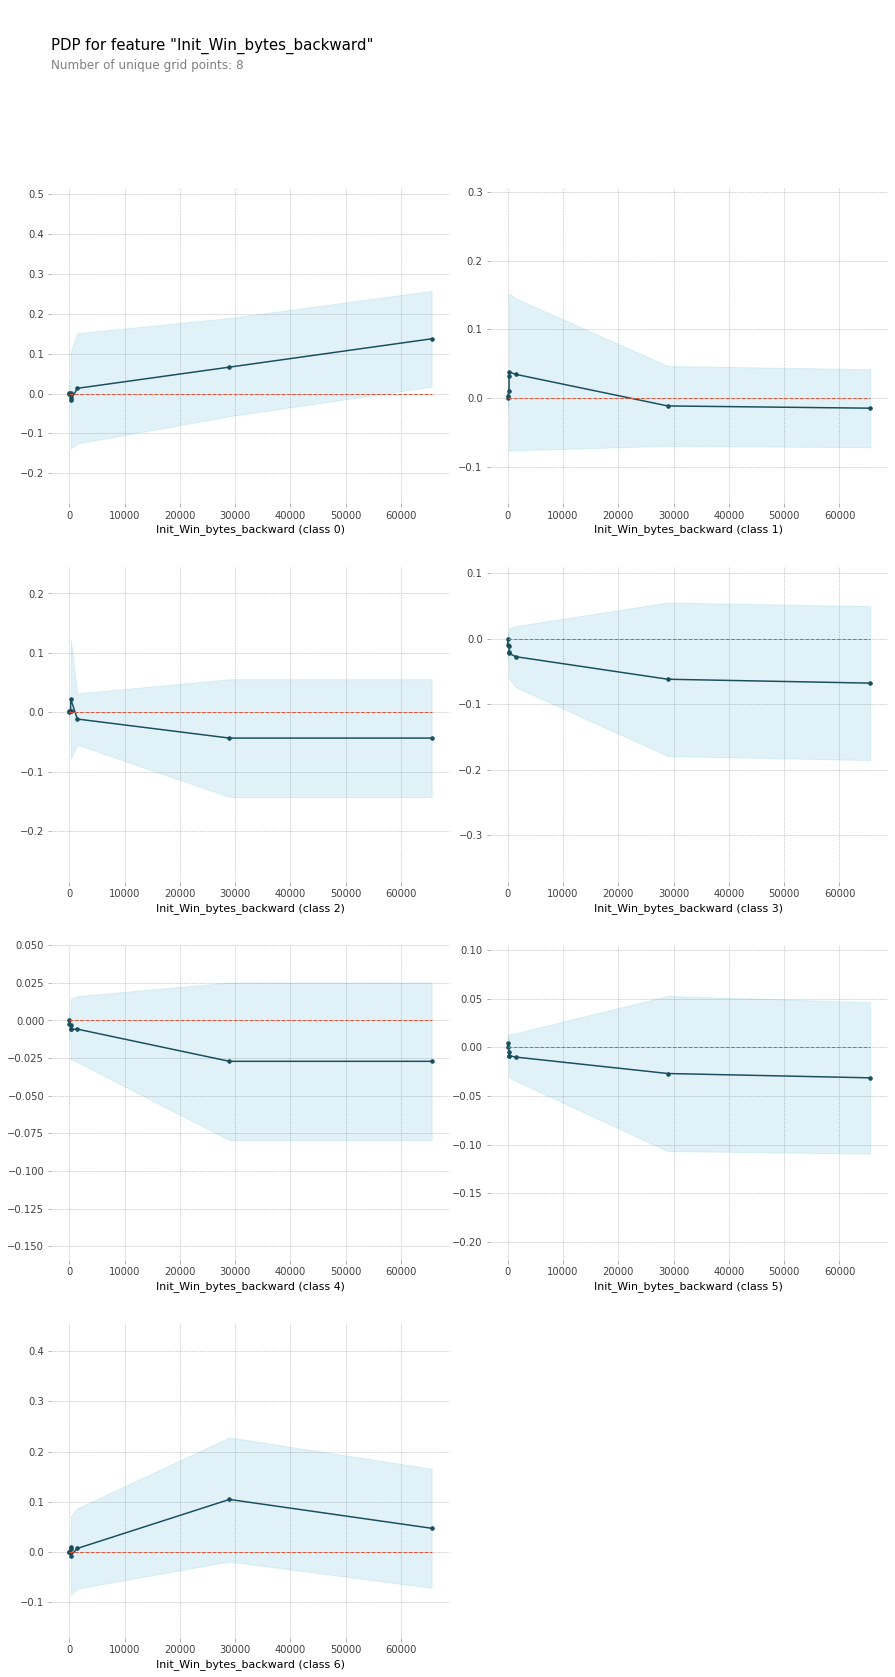

In [ ]:
import matplotlib.pyplot as plt
from pdpbox import pdp,get_dataset,info_plots

# create the data that we will plot
pdp_goals=pdp.pdp_isolate(model=modelRFC,dataset=x_test,model_features=x_test.columns,feature='Init_Win_bytes_backward')

pdp.pdp_plot(pdp_goals,'Init_Win_bytes_backward')
plt.show()

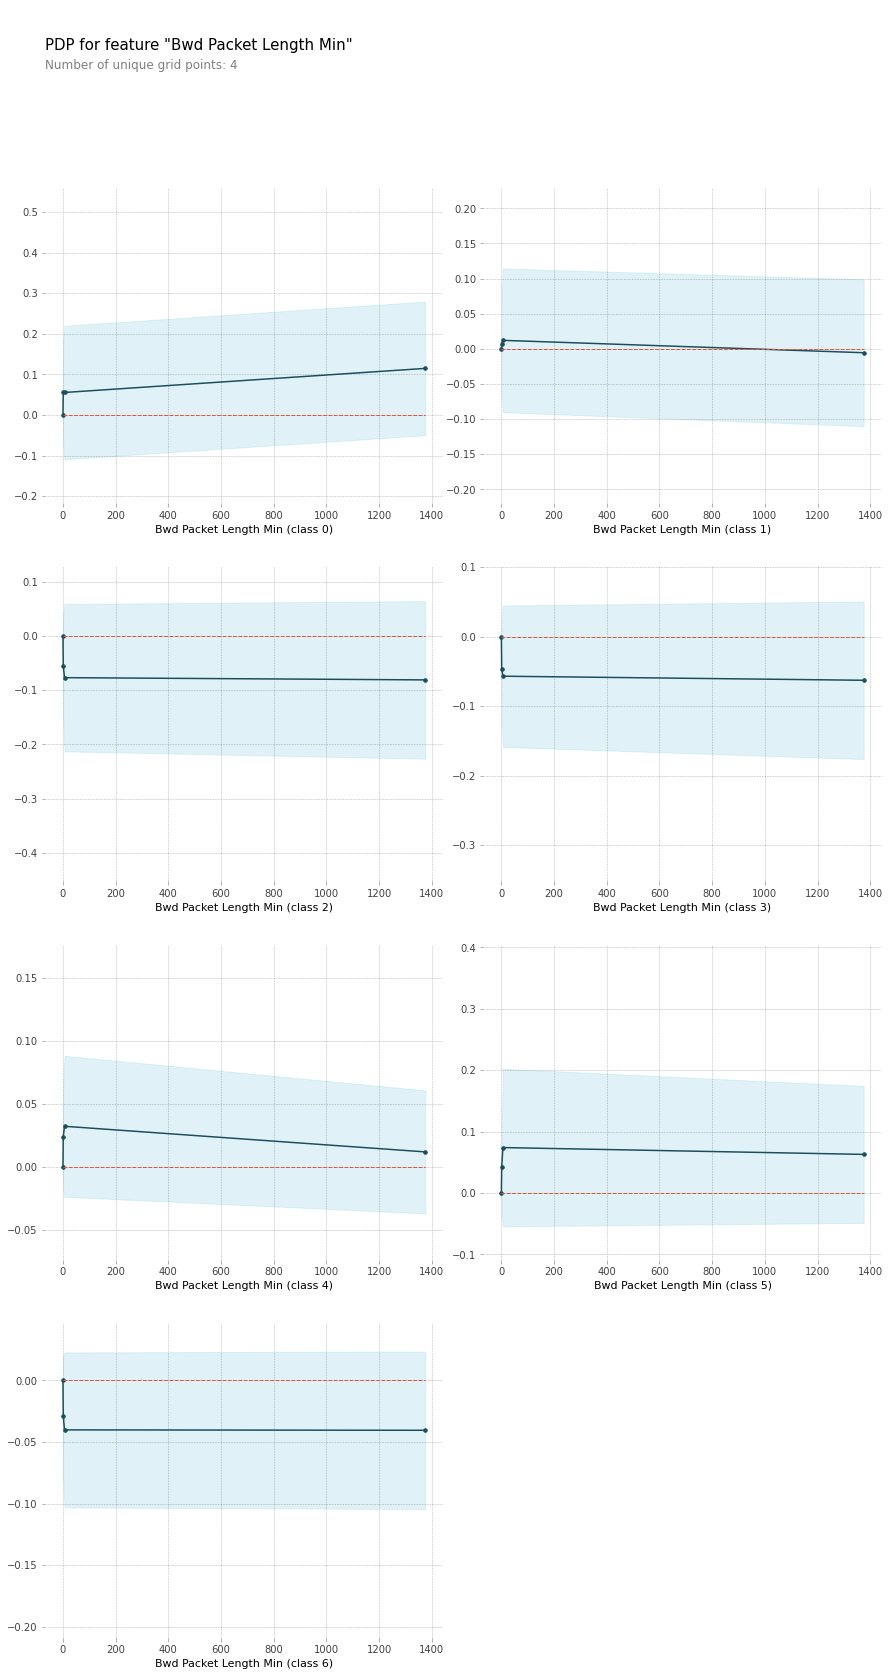

In [ ]:
import matplotlib.pyplot as plt
from pdpbox import pdp,get_dataset,info_plots

# create the data that we will plot
pdp_goals=pdp.pdp_isolate(model=modelRFC,dataset=x_test,model_features=x_test.columns,feature='Bwd Packet Length Min')

pdp.pdp_plot(pdp_goals,'Bwd Packet Length Min')
plt.show()

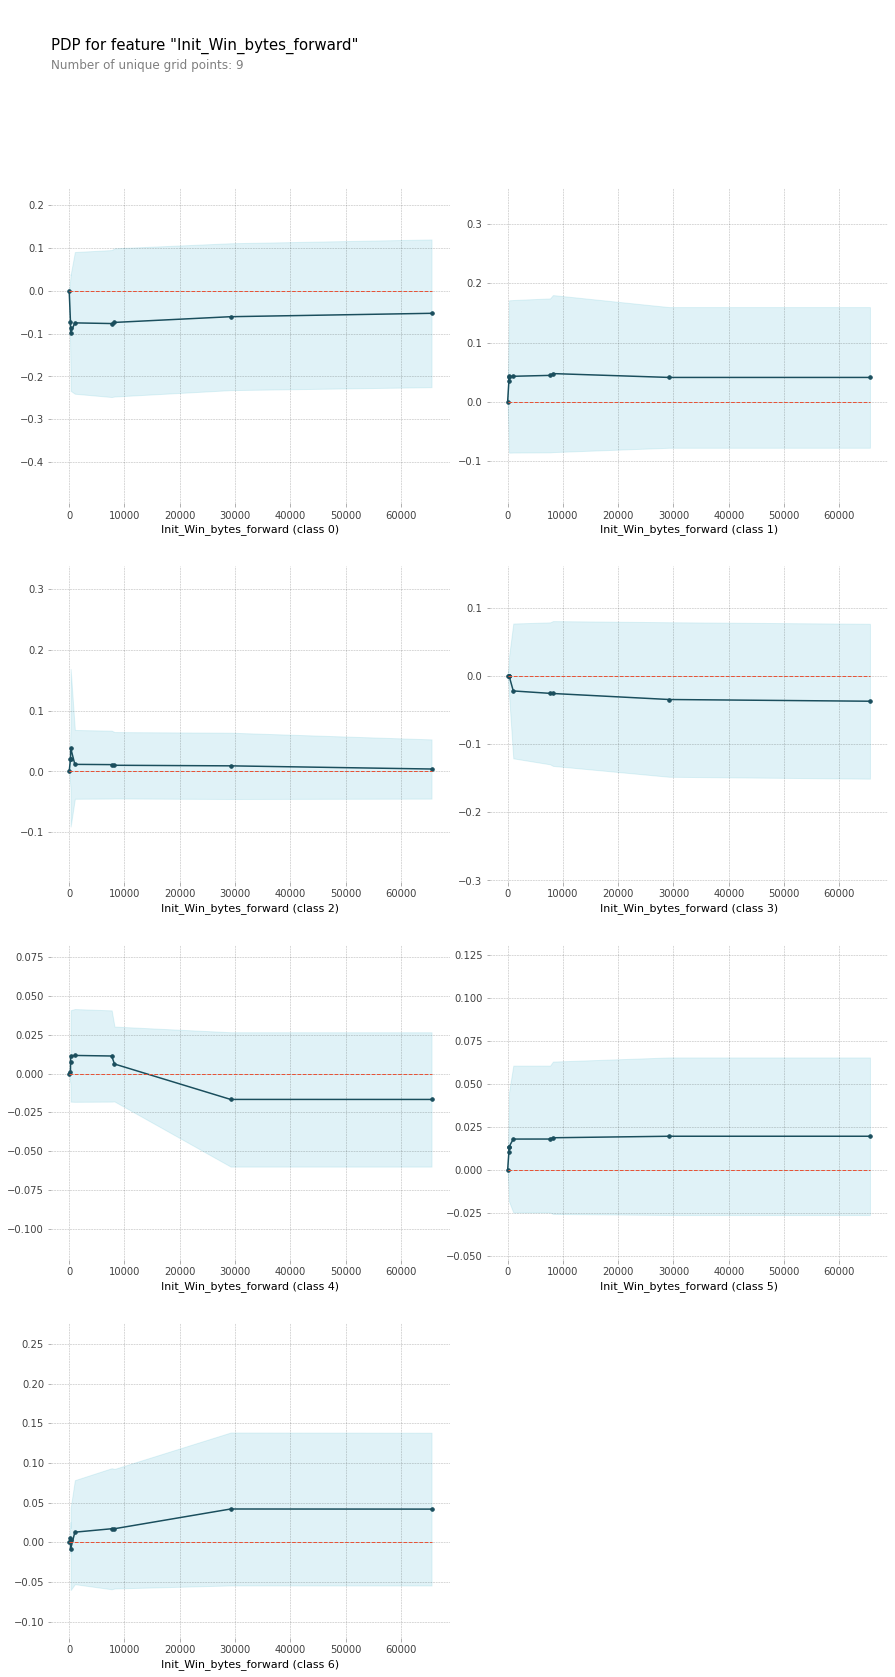

In [ ]:
import matplotlib.pyplot as plt
from pdpbox import pdp,get_dataset,info_plots

# create the data that we will plot
pdp_goals=pdp.pdp_isolate(model=modelRFC,dataset=x_test,model_features=x_test.columns,feature='Init_Win_bytes_forward')

pdp.pdp_plot(pdp_goals,'Init_Win_bytes_forward')
plt.show()

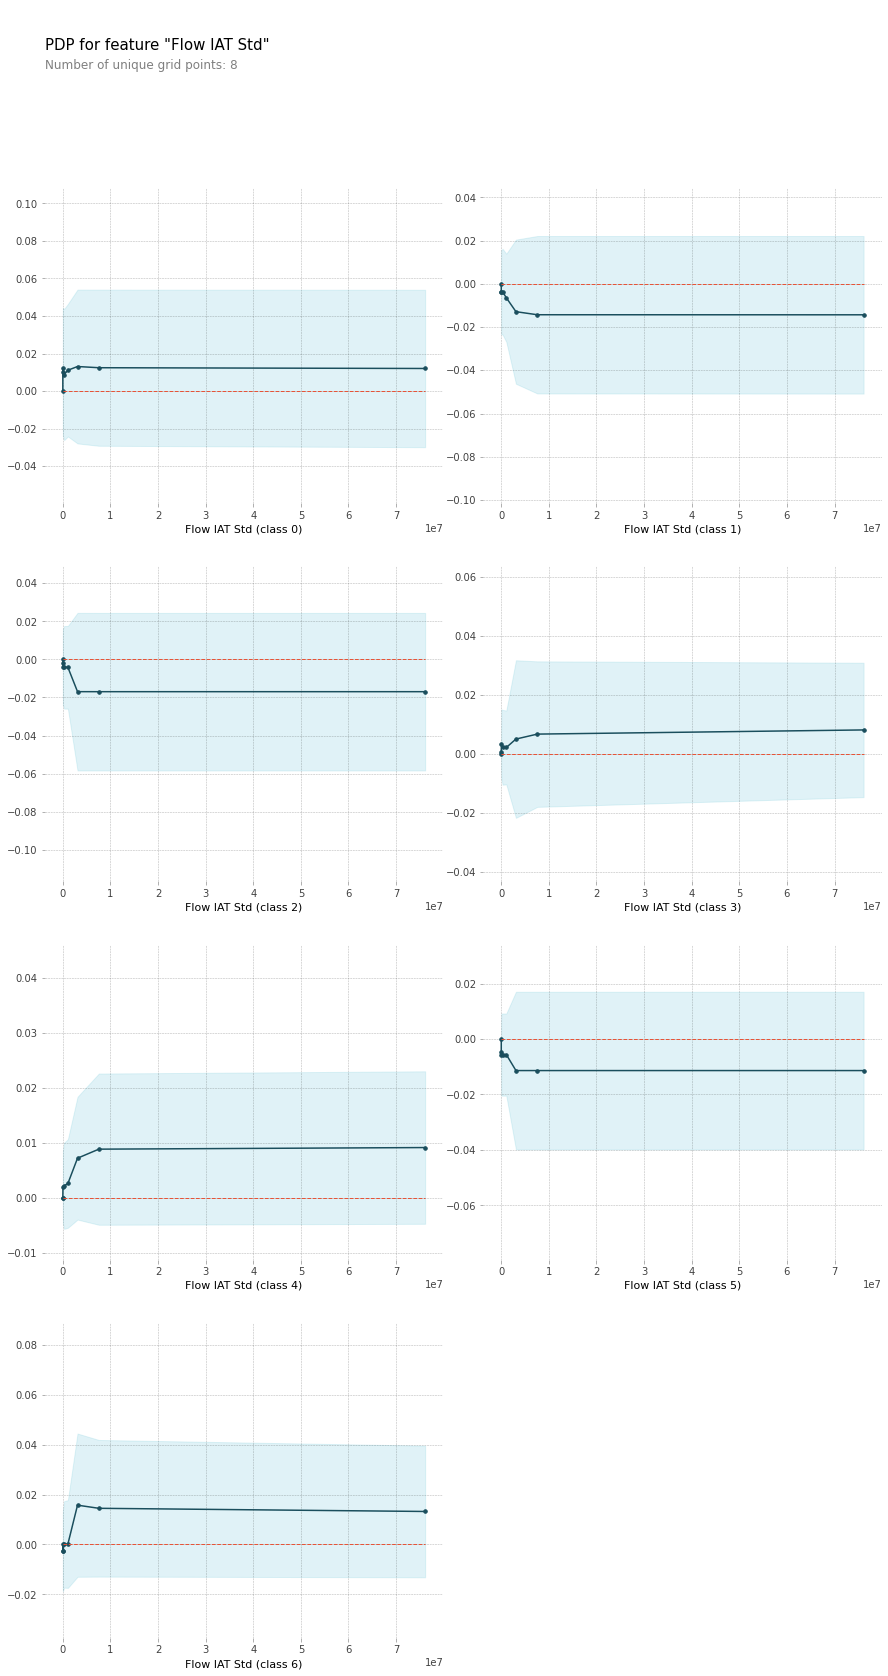

In [ ]:
import matplotlib.pyplot as plt
from pdpbox import pdp,get_dataset,info_plots

# create the data that we will plot
pdp_goals=pdp.pdp_isolate(model=modelRFC,dataset=x_test,model_features=x_test.columns,feature='Flow IAT Std')

pdp.pdp_plot(pdp_goals,'Flow IAT Std')
plt.show()

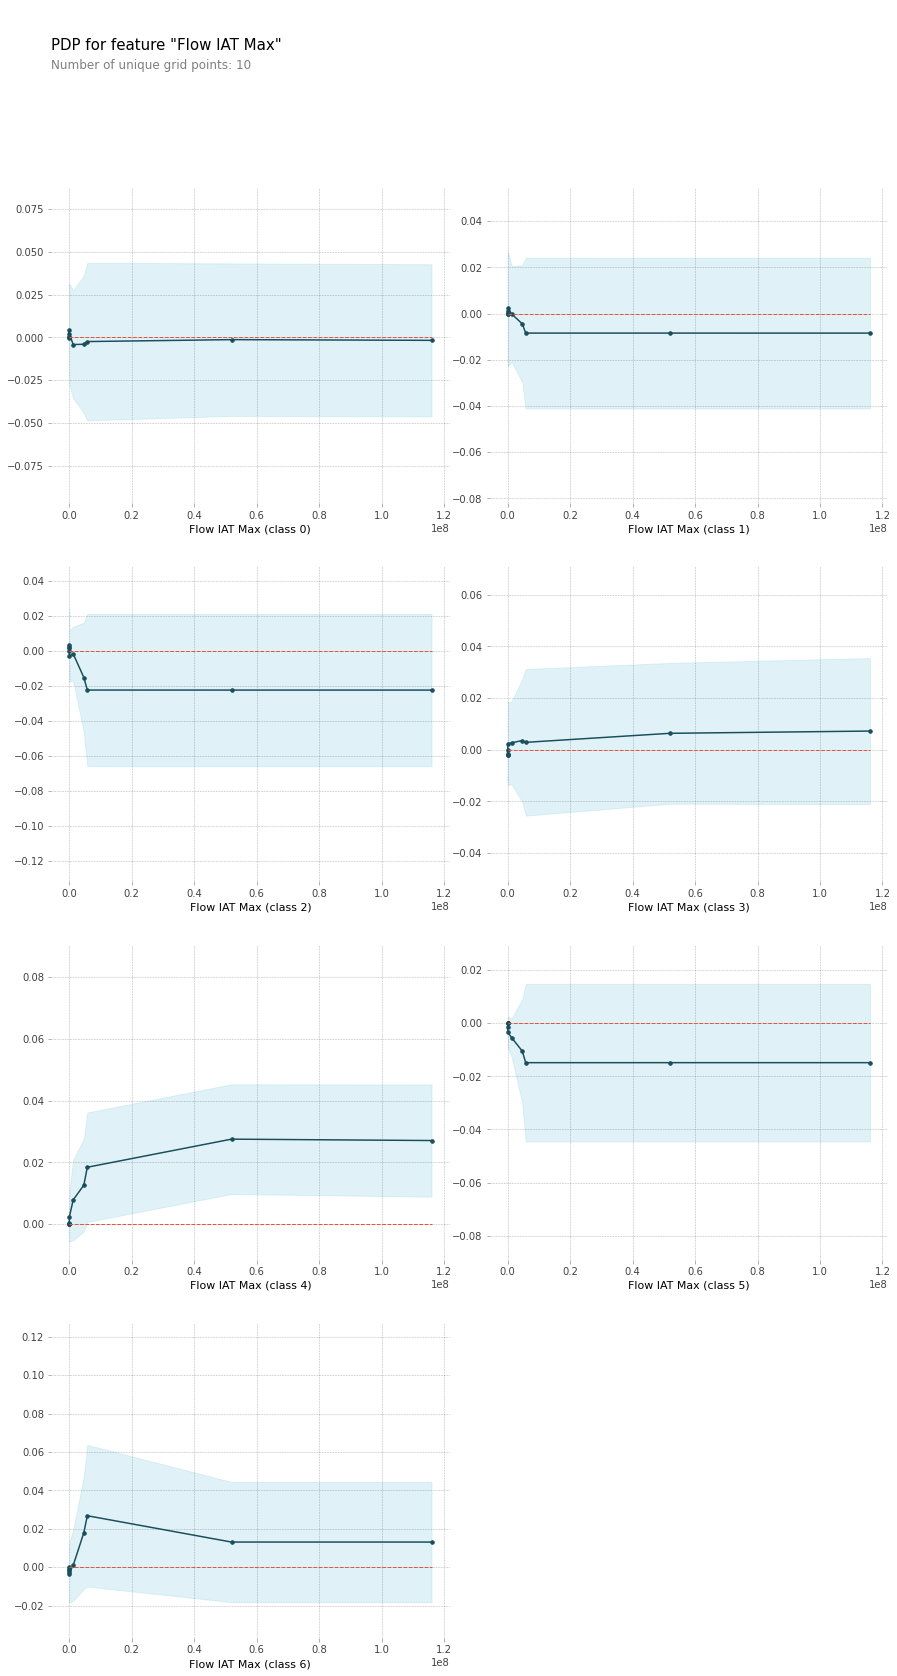

In [ ]:
import matplotlib.pyplot as plt
from pdpbox import pdp,get_dataset,info_plots

# create the data that we will plot
pdp_goals=pdp.pdp_isolate(model=modelRFC,dataset=x_test,model_features=x_test.columns,feature='Flow IAT Max')

pdp.pdp_plot(pdp_goals,'Flow IAT Max')
plt.show()

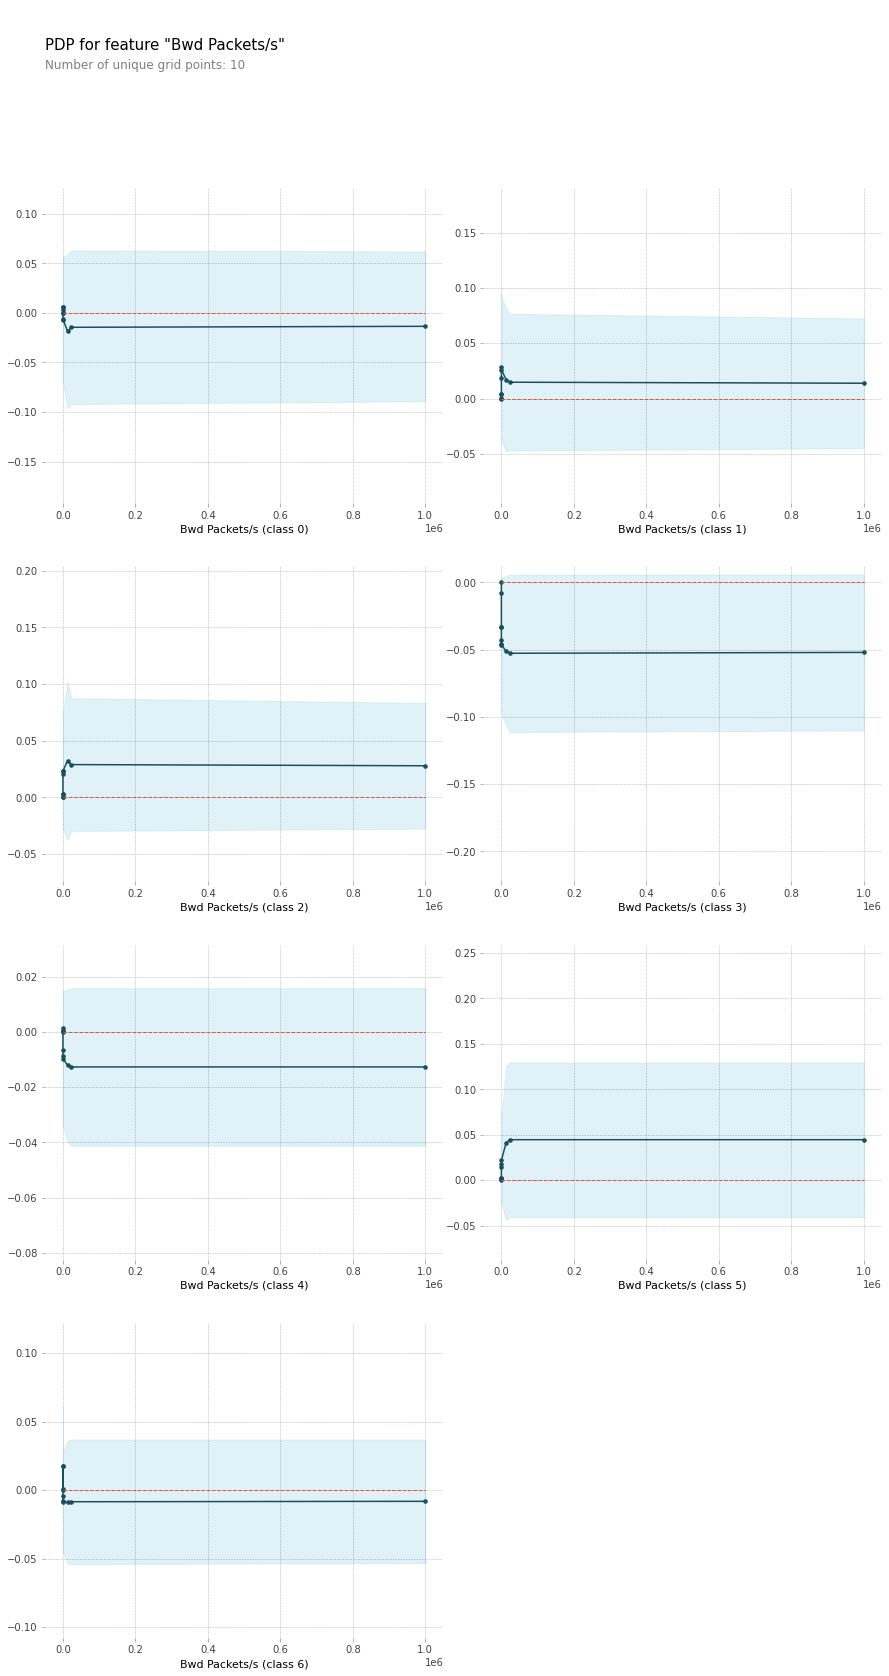

In [ ]:
import matplotlib.pyplot as plt
from pdpbox import pdp,get_dataset,info_plots

# create the data that we will plot
pdp_goals=pdp.pdp_isolate(model=modelRFC,dataset=x_test,model_features=x_test.columns,feature='Bwd Packets/s')

pdp.pdp_plot(pdp_goals,'Bwd Packets/s')
plt.show()

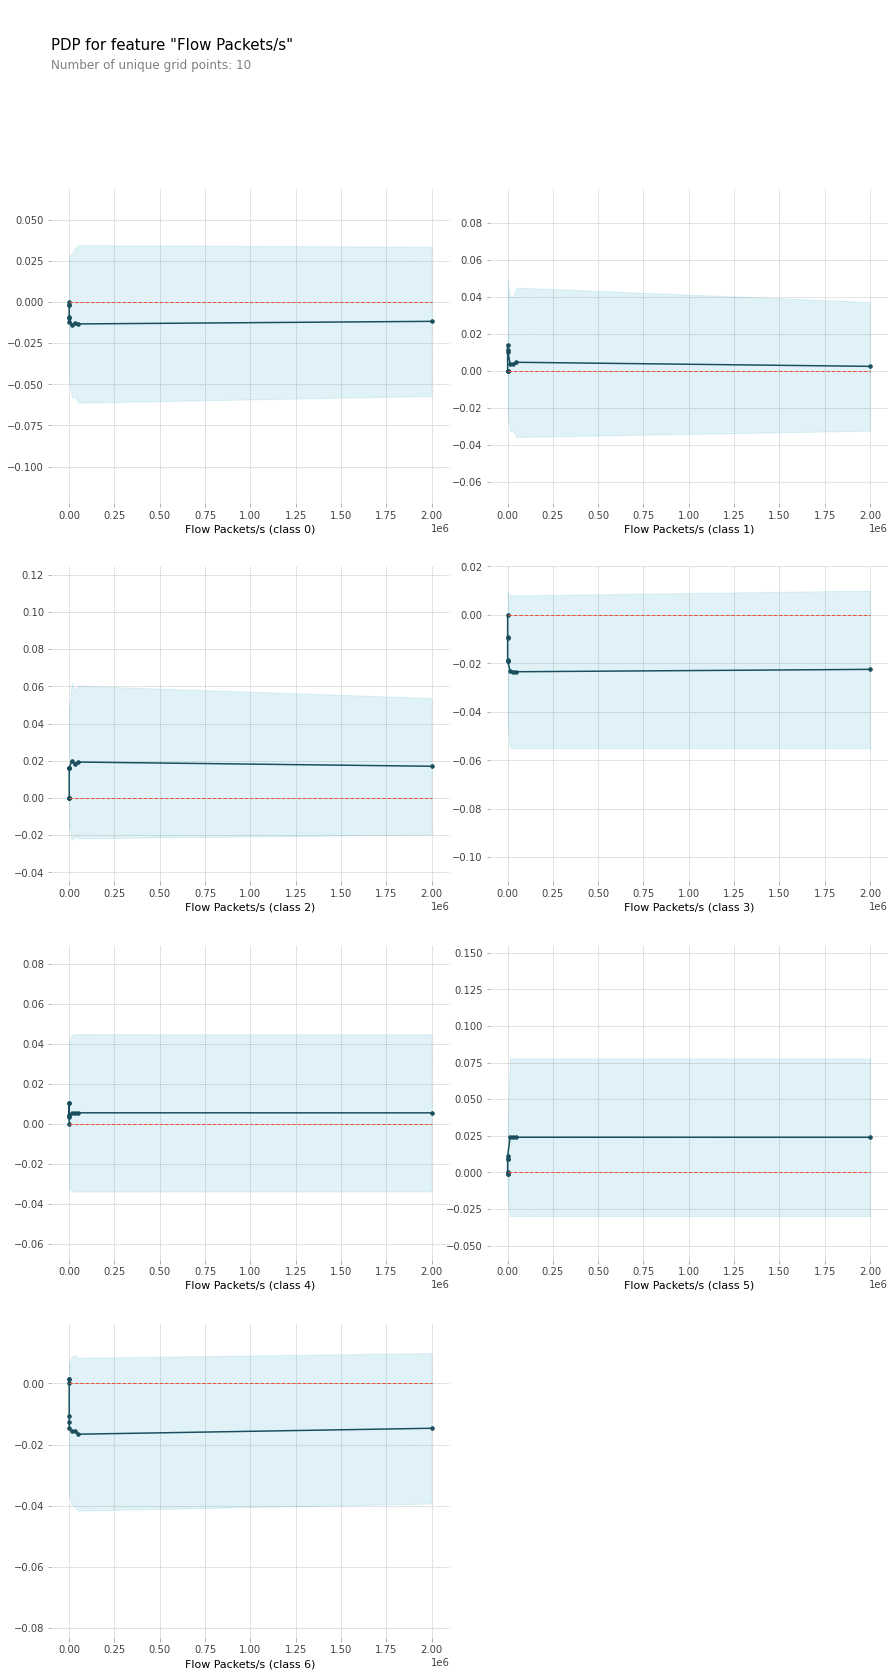

In [ ]:
import matplotlib.pyplot as plt
from pdpbox import pdp,get_dataset,info_plots

# create the data that we will plot
pdp_goals=pdp.pdp_isolate(model=modelRFC,dataset=x_test,model_features=x_test.columns,feature='Flow Packets/s')

pdp.pdp_plot(pdp_goals,'Flow Packets/s')
plt.show()